In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [43]:
# Display basic info
print(customers.info())
print(products.info())
print(transactions.info())

# Merge transactions with customer and product data
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [44]:
# Example EDA
# 1. Summary statistics
print(merged_data.describe())

          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


In [45]:
# 2. Top customers by total value
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print("Top 5 customers by total value:\n", top_customers.head())

Top 5 customers by total value:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


In [46]:
# 3. Popular products
popular_products = merged_data['ProductName'].value_counts()
print("Top 5 popular products:\n", popular_products.head())

Top 5 popular products:
 ProductName
ActiveWear Smartwatch    40
SoundWave Headphones     38
BookWorld Biography      30
ActiveWear Rug           29
SoundWave Cookbook       29
Name: count, dtype: int64


In [47]:
# 4. Visualization example: Sales over time
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
sales_trend = merged_data.groupby(merged_data['TransactionDate'].dt.date)['TotalValue'].sum()

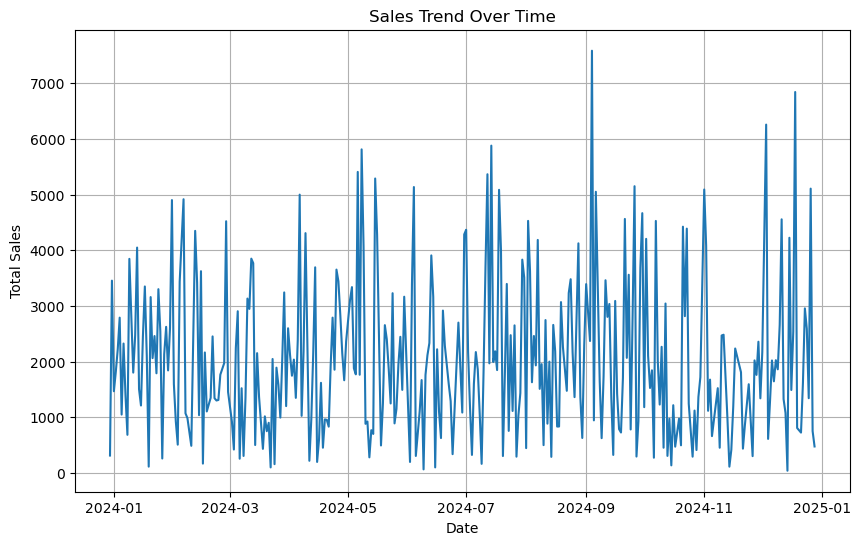

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(sales_trend)
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

merged_data.to_csv('merged_data.csv', index=False)

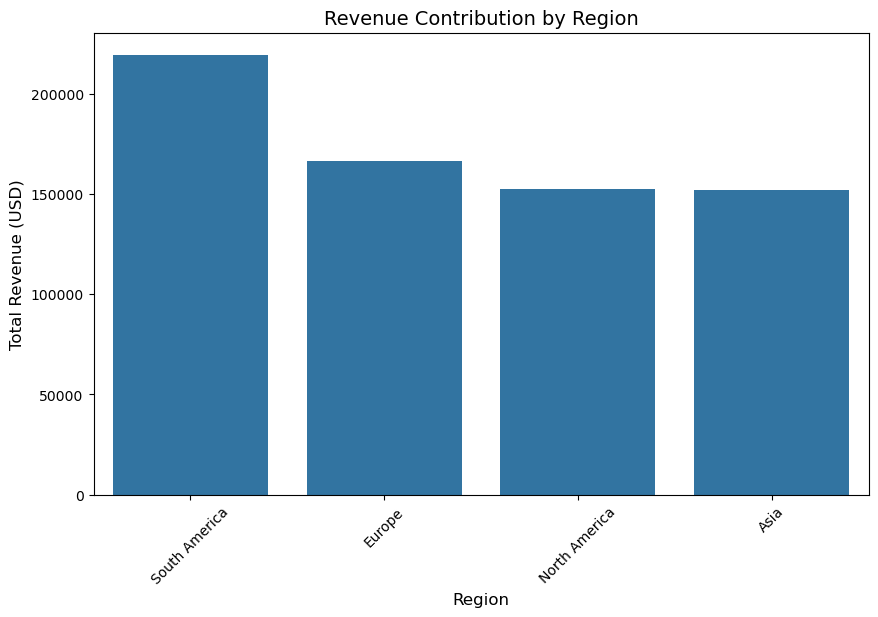

In [59]:
# Group by Region and calculate total revenue
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# Plot revenue by region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_revenue.index, y=region_revenue.values)
plt.title('Revenue Contribution by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


C:\Users\Mohith varma\AppData\Local\Temp\ipykernel_15424\592889366.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")


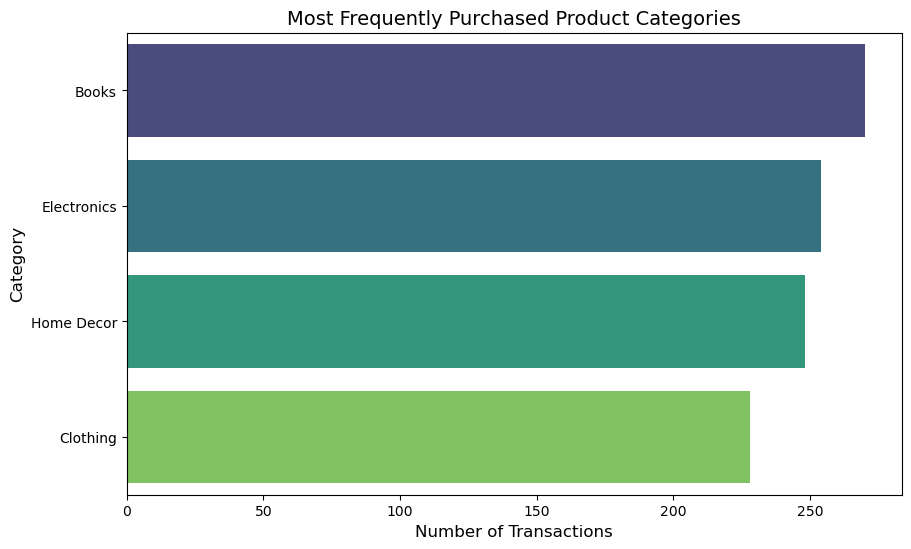

In [63]:
# Count transactions by product category
category_counts = merged_data['Category'].value_counts()

# Plot top categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")
plt.title('Most Frequently Purchased Product Categories', fontsize=14)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()
